In [28]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
#Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset for Model Building...')

In [3]:
url = 'https://raw.githubusercontent.com/SaurabhTripathi014/CementPrediction_Model/refs/heads/main/Concrete_Data.csv'

df = pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
755,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
806,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,7,24.00
425,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,14,32.90
762,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,32.72
114,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,22.90
...,...,...,...,...,...,...,...,...,...
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,53.39
463,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,100,56.06
202,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,56,35.34
743,397.0,0.0,0.0,186.0,0.0,1040.0,734.0,28,36.94


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
# OLS Regression/Prediction Model

import statsmodels.api as sm
# X is Independent Columns
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
# Y is an Dependent Column / Target Column
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Wed, 04 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:21:49   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Cehcking Datset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
# Checking Descriptive stats = EDA
# Univariate Analysis
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    # Saving all orderedDict Dictionary into DataFrame : Structured Format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


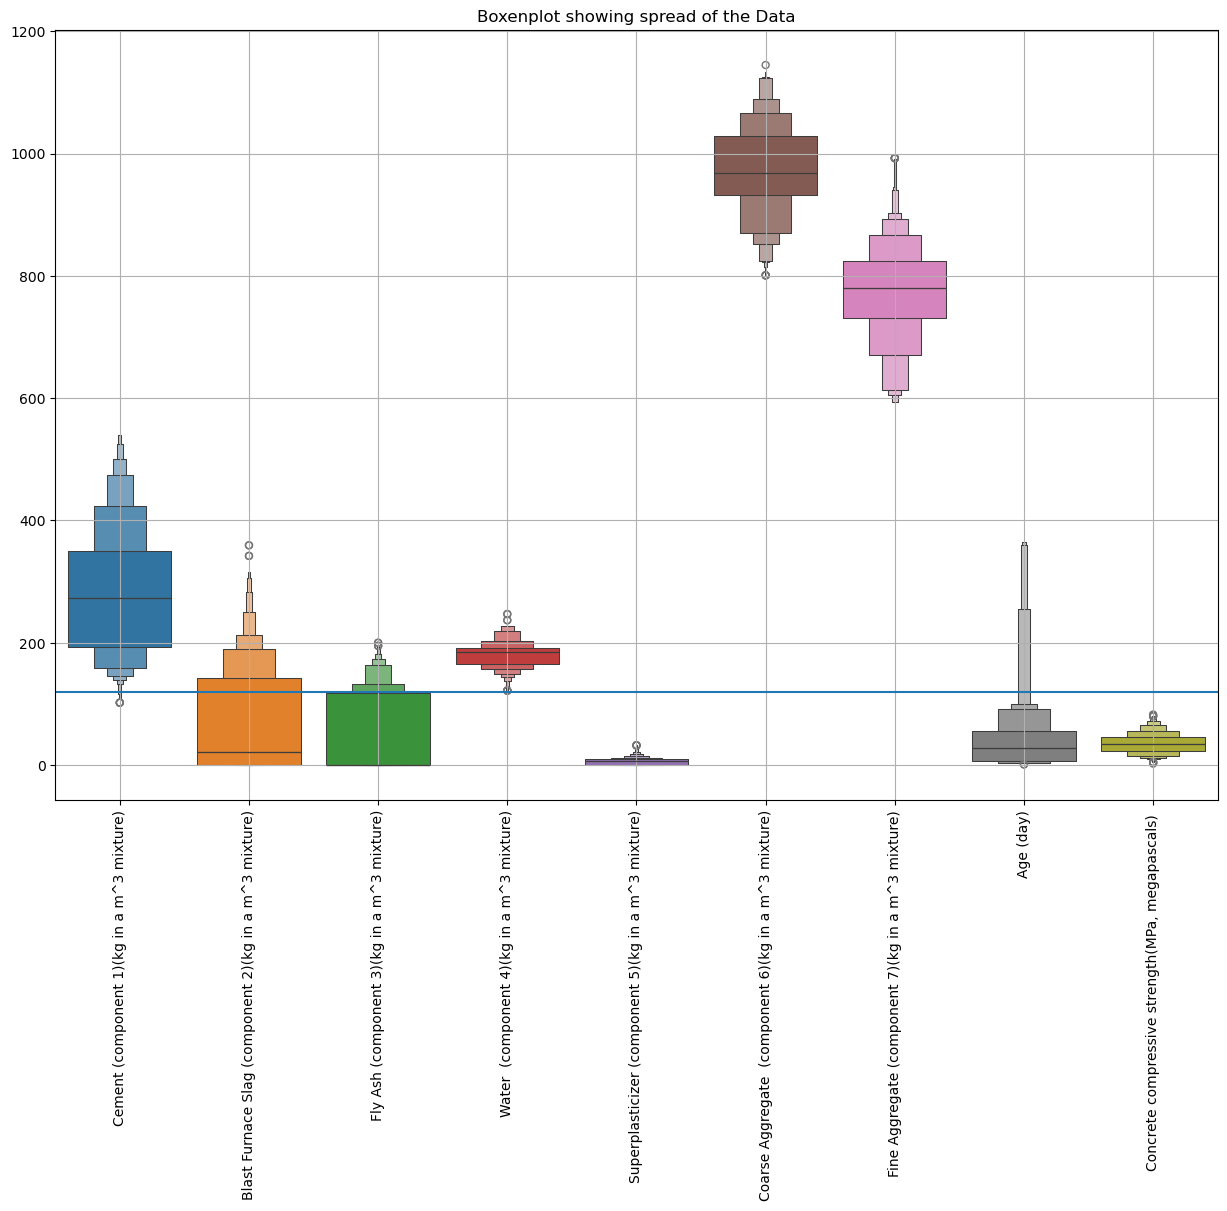

In [10]:
''' Note : if your data having positive skewness or negative skewness never ever impute the missing value with mean instead it should be imputed by median
1.Positive Kurtosis : leptoKurtic
2.Normal Kurtosis : Mesokurtic
3.Negative Kurtosis : Platykurtic
-------------------------------------------
1.Positive Skewness : mode < median < mean
2.Normal Skewness : mean = median = mode
3.Negative Skewness : mean < median < mode
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of the Data')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap showing Correlation w.r.t Target Column')

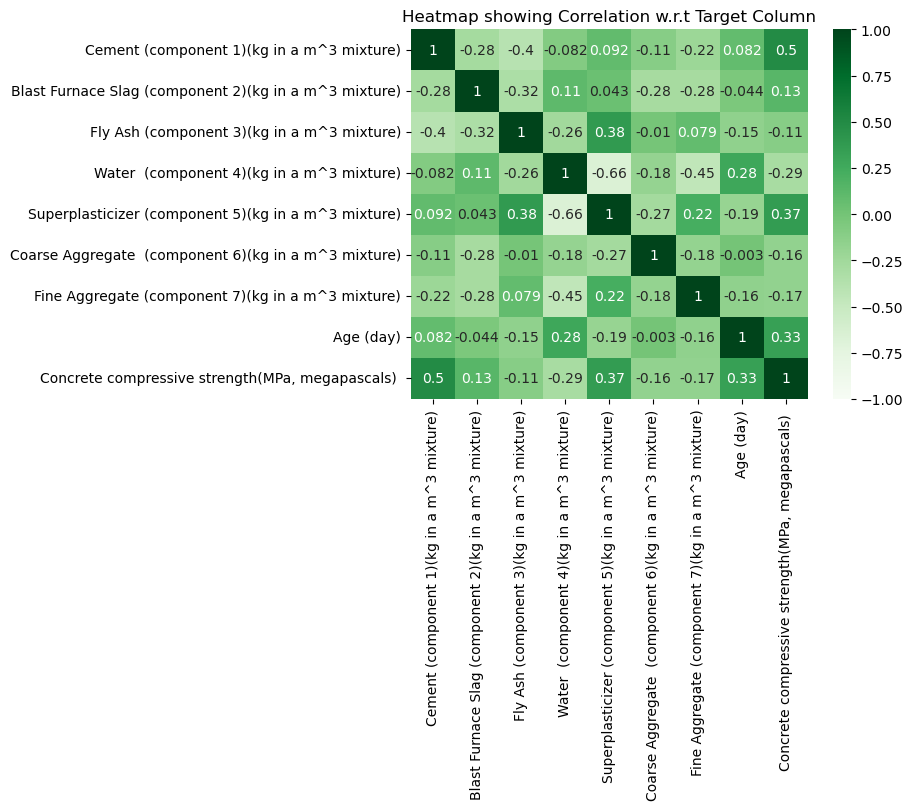

In [11]:
sns.heatmap(df.corr(),annot = True,center = 0, vmax = 1,vmin = -1,cmap = 'Greens')
plt.title('Heatmap showing Correlation w.r.t Target Column')

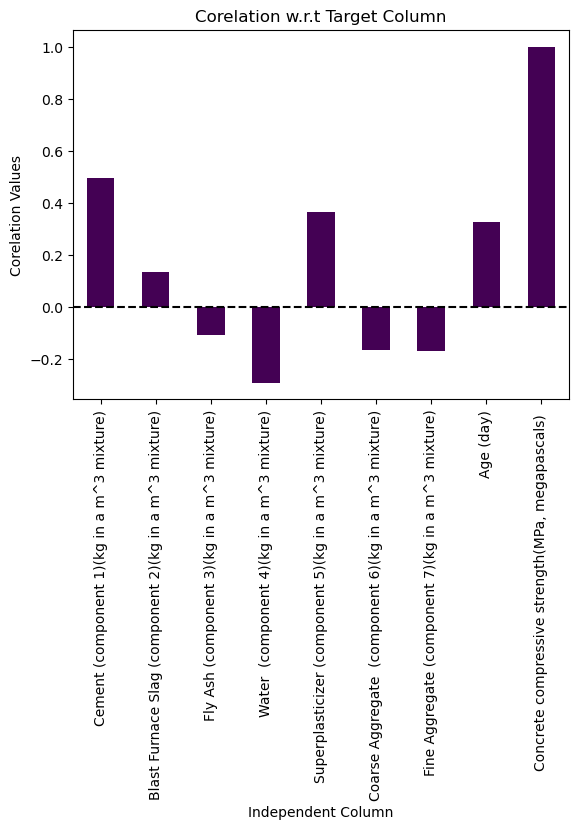

In [12]:
df.corr()[ 'Concrete compressive strength(MPa, megapascals) '].plot(kind = 'bar',cmap = 'viridis')
plt.axhline(0,linestyle = '--',color = 'black')
plt.title('Corelation w.r.t Target Column')
plt.ylabel('Corelation Values')
plt.xlabel('Independent Column')
plt.show()

In [13]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [14]:
# Preventing Data Leackage

# Step 01 : split the Dataset into X and y

# Where X: Independent Columns and y is independent column : Target Column
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using Train Test Split
# test_size lies between 0.20 to 0.35
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)
X_train

#Step 03: Using Scaling Technique 
sc = MinMaxScaler()

# Seen Data
X_train = sc.fit_transform(X_train)
# Unseen Data
X_test = sc.transform(X_test)


In [15]:
X_train.max(),X_train.min()

(1.0000000000000002, 0.0)

In [16]:
# MODEL BUILDING 

#Linear Regression

from sklearn.linear_model import LinearRegression
# Fit model is always on training or seen data
LR = LinearRegression().fit(X_train,y_train)
# Prediction values are based on Unseen data i.e. Test Data
y_pred_LR = LR.predict(X_test)
# y_test : actual value , y_pred : predicted value
print('Model Accuracy for Linear Regression',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression 0.5943782479239215


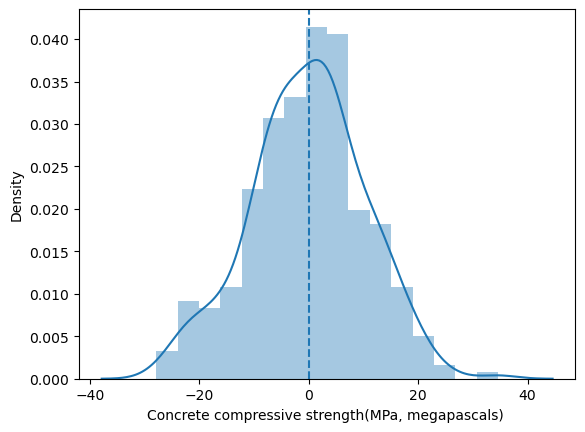

In [17]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle = '--')

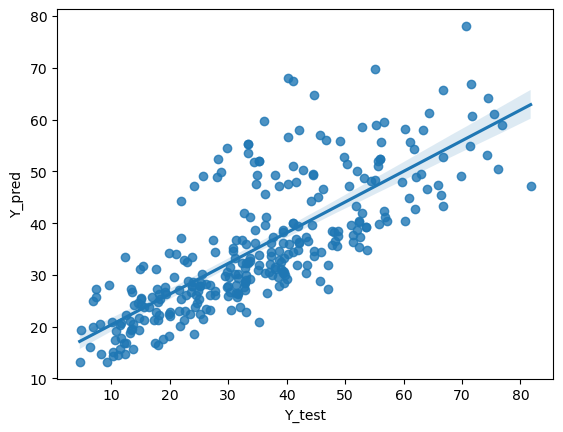

In [58]:
# Model Performance 
sns.regplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [19]:
# Evaluate Coeficient
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [20]:
# Evaluate Constant Value
LR.intercept_

-13.616932642237437

In [21]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy For Decision Tree Regressor',r2_score(y_test,y_pred_DT))

The Model Accuracy For Decision Tree Regressor 0.8145923262018743


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

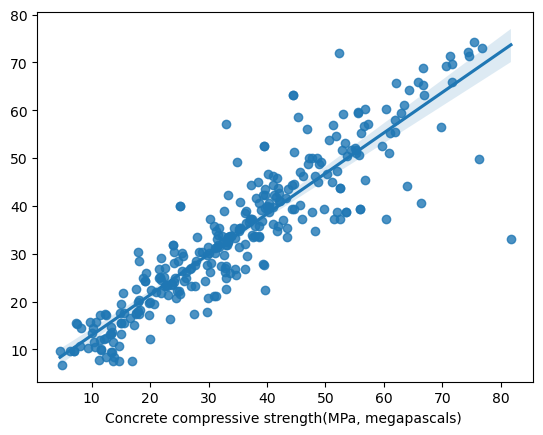

In [22]:
sns.regplot(x = y_test,y = y_pred_DT)


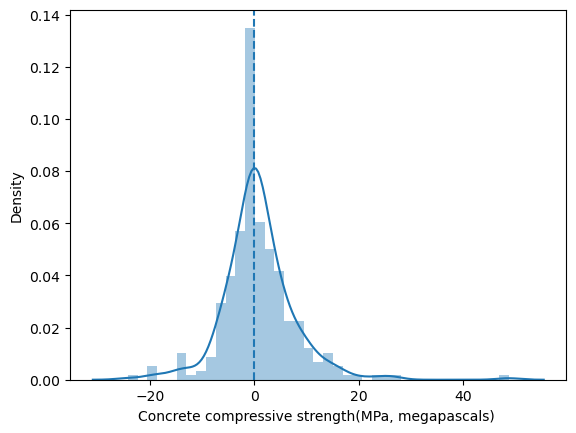

In [23]:
sns.distplot(y_test-y_pred_DT)
plt.axvline(0,linestyle = '--')

In [24]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy For Random Forest Regressor',r2_score(y_test,y_pred_RF))



The Model Accuracy For Random Forest Regressor 0.8842904853987608


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

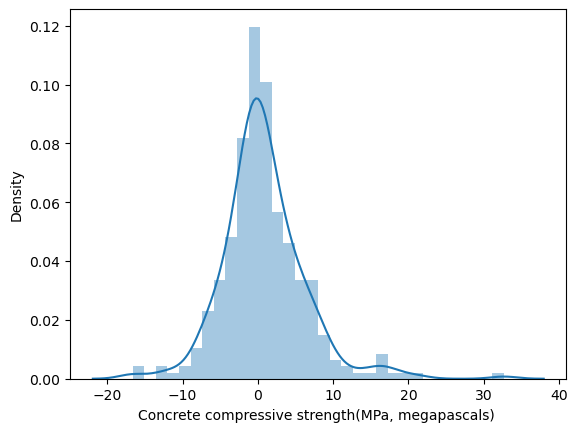

In [25]:
sns.distplot(y_test-y_pred_RF)

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

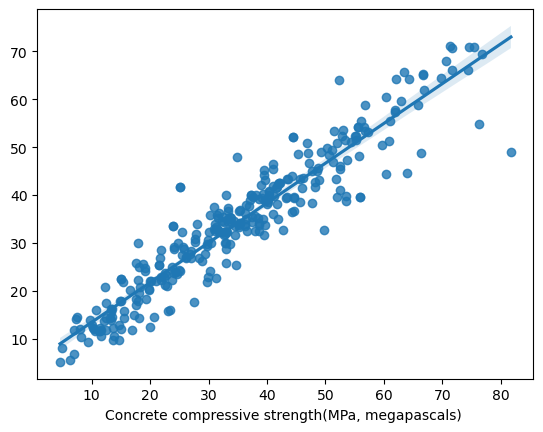

In [26]:
sns.regplot(x = y_test,y = y_pred_RF)

In [72]:
Features = RF.feature_importances_

In [74]:
feature_name = X.columns
importance_df = pd.Series(Features, index=feature_name)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.330497
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.071772
Fly Ash (component 3)(kg in a m^3 mixture)               0.018944
Water  (component 4)(kg in a m^3 mixture)                0.114526
Superplasticizer (component 5)(kg in a m^3 mixture)      0.068967
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.025611
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.035516
Age (day)                                                0.334167
dtype: float64

In [82]:
# Boosting Algorithm
# Using Xgboost Algorithm

import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9104444067517969


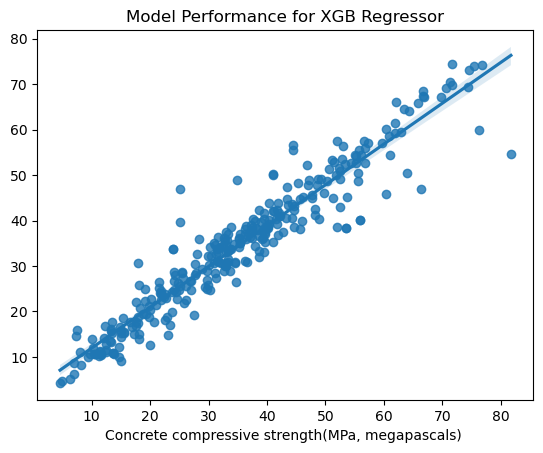

In [86]:
# Model Performance for XGB
sns.regplot(x = y_test,y = y_pred_xgb)
plt.title('Model Performance for XGB Regressor')
plt.show()

In [111]:
# Using ADABoosting Algorithm 
from sklearn.ensemble import AdaBoostRegressor

ADAB = AdaBoostRegressor().fit(X_train, y_train)
y_pred_ADAB = ADAB.predict(X_test)

print('Model Accuracy for ADABoost Regressor',r2_score(y_test,y_pred_ADAB))

Model Accuracy for ADABoost Regressor 0.7703283469487328


In [115]:
# Using Gradient Boost Algorithm
from sklearn.ensemble import GradientBoostingRegressor

GRE = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_GRE = GRE.predict(X_test)

print('Model Accuracy for ADABoost Regressor',r2_score(y_test,y_pred_GRE))

Model Accuracy for ADABoost Regressor 0.8913057136954469


In [121]:
# Using KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

print('Model Accuracy for KNN boost Regressor',r2_score(y_test,y_pred_KNN))

Model Accuracy for KNN boost Regressor 0.6457281524418169
